In [1]:
# ===============================
# Librairies
# ===============================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.decomposition import PCA

import tensorflow as tf
from keras import layers, models, callbacks, optimizers, losses, metrics

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

In [ ]:
# ===============================
# Load a real time series
# ===============================
def load_data_from_csv(filepath):
    # Load CSV without header
    df = pd.read_csv(filepath, header=None)
    # Combine first two rows into a single header
    header1 = df.iloc[0].fillna("")  # market symbols
    header2 = df.iloc[1].fillna("")  # OHLCV etc
    # Create new column names
    new_header = []
    for h1, h2 in zip(header1, header2):
        if h1 != "":
            new_header.append(f"{h1}_{h2}" if h2 != "" else h1)
        else:
            new_header.append(h2)
    # Drop first two rows from the data
    df = df[2:]
    df.columns = new_header
    df = df.reset_index(drop=True)
    # Optional: remove fully empty columns
    df = df.dropna(axis=1, how='all')
    return df

df_load = load_data_from_csv("../data/Stock_Market_Initial_Data.csv")
df_load

/var/folders/8j/y46wyjvx641clg_t_cq0ggfc0000gn/T/ipykernel_27580/2770967110.py:6: DtypeWarning: Columns (1,2,3,4,5,6,8,9,10,11,12,13,15,16,17,18,19,20,22,23,24,25,26,27,29,30,31,32,33,34,36,37,38,39,40,41,43,44,45,46,47,48,50,51,52,53,54,55,57,58,59,60,61,62,64,65,66,67,68,69,71,72,73,74,75,76,78,79,80,81,82,83,85,86,87,88,89,90,92,93,94,95,96,97,99,100,101,102,103,104,106,107,108,109,110,111,113,114,115,116,117,118,120,121,122,123,124,125,127,128,129,130,131,132,134,135,136,137,138,139,141,142,143,144,145,146,148,149,150,151,152,153,155,156,157,158,159,160,162,163,164,165,166,167,169,170,171,172,173,174,176,177,178,179,180,181,183,184,185,186,187,188,190,191,192,193,194,195,197,198,199,200,201,202,204,205,206,207,208,209,211,212,213,214,215,216,218,219,220,221,222,223,225,226,227,228,229,230) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath, header=None)


,Date,^GSPC_High,Low,Open,Close,Volume,Adj Close,^IXIC_High,Low,Open,...,Open,Close,Volume,Adj Close,^JN0U.JO_High,Low,Open,Close,Volume,Adj Close
0,12/31/1996,753.9500122,740.7399902,753.8499756,740.7399902,399760000,740.7399902,1291.880005,1285.449951,1289.23999,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1/2/1997,742.8099976,729.5499878,740.7399902,737.0100098,463230000,737.0100098,1293.630005,1272.339966,1292.650024,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1/3/1997,748.2399902,737.0100098,737.0100098,748.0300293,452970000,748.0300293,1310.839966,1280.699951,1288.02002,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1/6/1997,753.3099976,743.8200073,748.0300293,747.6500244,531350000,747.6500244,1321.469971,1310.630005,1314.339966,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1/7/1997,753.2600098,742.1799927,747.6500244,753.2299805,538220000,753.2299805,1327.819946,1312.079956,1316.910034,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6504,11/2/2022,3894.439941,3758.679932,3852.899902,3759.689941,4899000000,3759.689941,10993.24023,10522.90039,10885.00977,...,NaN,NaN,NaN,NaN,3640.830078,3566.639893,3602.090088,3573.790039,0.0,3573.790039
6505,11/3/2022,3750.590088,3698.149902,3733.25,3719.889893,4625290000,3719.889893,10486.00977,10319.54004,10399.4502,...,NaN,NaN,NaN,NaN,3557.22998,3431.080078,3557.0,3474.129883,0.0,3474.129883
6506,11/4/2022,3796.340088,3708.840088,3766.97998,3770.550049,0,3770.550049,10553.62988,10262.92969,10548.13965,...,NaN,NaN,NaN,NaN,3765.290039,3497.070068,3498.77002,3751.629883,0.0,3751.629883
6507,11/7/2022,3813.949951,3764.699951,3780.709961,3806.800049,4341620000,3806.800049,10587.95996,10428.91016,10516.94043,...,NaN,NaN,NaN,NaN,3826.070068,3695.27002,3749.379883,3815.75,0.0,3815.75


In [3]:
# ===============================
# Function to extract market data for a specific index from the CSV file
# ===============================
def extract_market_data(df, market_name):
    """
    Extract Date + OHLCV columns for a given market
    """
    df.columns = df.columns.str.strip()
    high_col_candidates = [c for c in df.columns if c.startswith(f"{market_name}_High")]
    if not high_col_candidates:
        raise ValueError(f"Column starting with {market_name}_High not found.")
    
    high_col = high_col_candidates[0]
    high_idx = df.columns.get_loc(high_col)
    
    # Date + next 6 columns (High, Low, Open, Close, Volume, Adj Close)
    cols_idx = [0] + list(range(high_idx, high_idx + 6))
    df_market = df.iloc[:, cols_idx].copy()
    df_market = df_market.reset_index(drop=True)
    
    # Rename columns for clarity
    df_market.columns = ["Date", "High", "Low", "Open", "Close", "Volume", "Adj Close"]
    df_market[["High", "Low", "Open", "Close", "Volume", "Adj Close"]] = df_market[["High", "Low", "Open", "Close", "Volume", "Adj Close"]].astype(float)
    return df_market

# Example for ^GSPC
df_gspc = extract_market_data(df_load, "^GSPC")
df_gspc

,Date,High,Low,Open,Close,Volume,Adj Close
0,12/31/1996,753.950012,740.739990,753.849976,740.739990,3.997600e+08,740.739990
1,1/2/1997,742.809998,729.549988,740.739990,737.010010,4.632300e+08,737.010010
2,1/3/1997,748.239990,737.010010,737.010010,748.030029,4.529700e+08,748.030029
3,1/6/1997,753.309998,743.820007,748.030029,747.650024,5.313500e+08,747.650024
4,1/7/1997,753.260010,742.179993,747.650024,753.229981,5.382200e+08,753.229981
...,...,...,...,...,...,...,...
6504,11/2/2022,3894.439941,3758.679932,3852.899902,3759.689941,4.899000e+09,3759.689941
6505,11/3/2022,3750.590088,3698.149902,3733.250000,3719.889893,4.625290e+09,3719.889893
6506,11/4/2022,3796.340088,3708.840088,3766.979980,3770.550049,0.000000e+00,3770.550049
6507,11/7/2022,3813.949951,3764.699951,3780.709961,3806.800049,4.341620e+09,3806.800049


In [4]:
# ===============================
# Select only the close 
# ===============================
df_gspc = df_gspc[['Close']]
df_gspc

,Close
0,740.739990
1,737.010010
2,748.030029
3,747.650024
4,753.229981
...,...
6504,3759.689941
6505,3719.889893
6506,3770.550049
6507,3806.800049


In [5]:
# ===============================
# Preprocess the data to add additional informations
# ===============================
def preprocess_data(df):
    df['SMA_50'] = df['Close'].rolling(window=50).mean()
    df['EMA_50'] = df['Close'].ewm(span=20, adjust=False).mean()
    df['Daily_Return'] = df['Close'].pct_change()
    df['Log_Return'] = np.log(df['Close'] / df['Close'].shift(1))

    delta = df['Close'].diff(1)
    gain = (delta.where(delta >0,0)).rolling(window=14).mean()
    loss = (-delta.where(delta<0,0)).rolling(window=14).mean()
    rs = gain / loss
    df['RSI_14'] = 100 -(100 / (1 + rs))
    df['Middle_Band'] = df['Close'].rolling(window=20).mean()
    df['Upper_Band'] = df['Middle_Band'] + (df['Close'].rolling(window=20).std() * 2)
    df['Lower_Band'] = df['Middle_Band'] - (df['Close'].rolling(window=20).std() * 2)
    df['Momentum'] = df['Close'] - df['Close'].shift(4)
    df['Volatility'] = df['Close'].rolling(window=21).std()

    df.dropna(inplace=True)
    return df

df = preprocess_data(df_gspc)
df

/var/folders/8j/y46wyjvx641clg_t_cq0ggfc0000gn/T/ipykernel_27580/2060731108.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['SMA_50'] = df['Close'].rolling(window=50).mean()
/var/folders/8j/y46wyjvx641clg_t_cq0ggfc0000gn/T/ipykernel_27580/2060731108.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['EMA_50'] = df['Close'].ewm(span=20, adjust=False).mean()
/var/folders/8j/y46wyjvx641clg_t_cq0ggfc0000gn/T/ipykernel_27580/2060731108.py:7: SettingWithCopyWarning: 
A value is trying to be set on a co

,Close,SMA_50,EMA_50,Daily_Return,Log_Return,RSI_14,Middle_Band,Upper_Band,Lower_Band,Momentum,Volatility
49,804.260010,783.756802,800.417040,-0.008726,-0.008765,50.909105,804.566504,819.739280,789.393728,5.700012,8.084326
50,789.559998,784.733202,799.383036,-0.018278,-0.018447,43.503236,803.906003,820.492332,787.319673,-15.409973,8.086977
51,793.169983,785.856401,798.791317,0.004572,0.004562,40.395170,802.973502,819.781986,786.165017,-20.480041,8.415844
52,795.710022,786.810001,798.497860,0.003202,0.003197,40.919208,802.335004,819.232700,785.437307,-15.630005,8.343382
53,789.659973,787.650200,797.656157,-0.007603,-0.007632,41.056270,801.003503,817.462288,784.544719,-14.600037,8.687013
...,...,...,...,...,...,...,...,...,...,...,...
6504,3759.689941,3821.862212,3777.747117,-0.025002,-0.025320,55.920447,3730.511011,3937.184825,3523.837196,-47.610108,101.376472
6505,3719.889893,3813.444609,3772.236905,-0.010586,-0.010642,59.619210,3729.279504,3935.895362,3522.663647,-181.170166,100.747022
6506,3770.550049,3804.873208,3772.076252,0.013619,0.013527,56.941948,3735.824011,3938.746350,3532.901672,-101.429931,101.094061
6507,3806.800049,3799.856011,3775.383280,0.009614,0.009568,56.565535,3745.544519,3942.096299,3548.992739,-49.300049,100.097633


In [6]:
# ===============================
# Scale price datas not to cause imbalance into the model
# ===============================
price_cols = [
    "Close", "SMA_50", "EMA_50",
    "Middle_Band", "Upper_Band", "Lower_Band"
]
prices_scaler = RobustScaler()
df[price_cols] = prices_scaler.fit_transform(df[price_cols])
df

,Close,SMA_50,EMA_50,Daily_Return,Log_Return,RSI_14,Middle_Band,Upper_Band,Lower_Band,Momentum,Volatility
49,-0.583735,-0.597784,-0.592198,-0.008726,-0.008765,50.909105,-0.590604,-0.619209,-0.550200,5.700012,8.084326
50,-0.598863,-0.596778,-0.593269,-0.018278,-0.018447,43.503236,-0.591291,-0.618429,-0.552328,-15.409973,8.086977
51,-0.595148,-0.595620,-0.593883,0.004572,0.004562,40.395170,-0.592260,-0.619165,-0.553513,-20.480041,8.415844
52,-0.592534,-0.594636,-0.594187,0.003202,0.003197,40.919208,-0.592923,-0.619734,-0.554259,-15.630005,8.343382
53,-0.598760,-0.593770,-0.595059,-0.007603,-0.007632,41.056270,-0.594307,-0.621567,-0.555175,-14.600037,8.687013
...,...,...,...,...,...,...,...,...,...,...,...
6504,2.457691,2.534366,2.493976,-0.025002,-0.025320,55.920447,2.450096,2.608983,2.255559,-47.610108,101.376472
6505,2.416733,2.525688,2.488264,-0.010586,-0.010642,59.619210,2.448817,2.607648,2.254354,-181.170166,100.747022
6506,2.468867,2.516851,2.488097,0.013619,0.013527,56.941948,2.455618,2.610600,2.264859,-101.429931,101.094061
6507,2.506172,2.511679,2.491525,0.009614,0.009568,56.565535,2.465720,2.614069,2.281370,-49.300049,100.097633


In [7]:
df.columns

Index(['Close', 'SMA_50', 'EMA_50', 'Daily_Return', 'Log_Return', 'RSI_14',
       'Middle_Band', 'Upper_Band', 'Lower_Band', 'Momentum', 'Volatility'],
      dtype='object')

In [8]:
# ===============================
# Some hyperparameters for model training 
# ===============================
SEQ_LEN = 60           # input window (days)
PRED_HORIZON = 1       # predict 1 step ahead (next day), for multi-step, see recursive forecast
BATCH_SIZE = 64
EPOCHS = 5
VAL_SIZE = 0.1         # fraction for validation (time split used below)
TEST_SIZE = 0.1        # fraction for test (time split used below)

In [9]:
# ===============================
# Define features and targets
# ===============================
FEATURE_COLS = ['SMA_50', 'EMA_50', 'Daily_Return', 'Log_Return', 'RSI_14', 'Middle_Band', 'Upper_Band', 'Lower_Band', 'Momentum', 'Volatility']
TARGET_COL = "Close"

In [10]:
# ===============================
# Build sequences
# ===============================
def build_sequences(df, feature_cols, target_col, seq_len=SEQ_LEN, pred_horizon=1):
    """
    Build X, y arrays for supervised learning.
    X shape: (N_samples, seq_len, n_features)
    y shape: (N_samples, pred_horizon)  # pred_horizon=1 gives (N,1)
    """
    data = df[feature_cols].to_numpy()
    target = df[target_col].to_numpy()

    N = len(df)
    X, y = [], []
    last_start = N - seq_len - pred_horizon + 1
    if last_start <= 0:
        raise ValueError("Not enough rows to build sequences. Reduce seq_len or pred_horizo")
    for i in range(last_start):
        X.append(data[i:i+seq_len])
        y.append(target[i+seq_len : i+seq_len+pred_horizon])
    X = np.array(X)
    y = np.array(y)
    # If pred_horizon==1, allow shape (N,) or (N,1) depending on downstream code. We'll keep (N, pred_horizon)
    return X, y

# Build sequences
X, y = build_sequences(df, FEATURE_COLS, TARGET_COL, seq_len=SEQ_LEN, pred_horizon=PRED_HORIZON)
print("X.shape, y.shape =", X.shape, y.shape)

X.shape, y.shape = (6400, 60, 10) (6400, 1)


In [11]:
# ===============================
# Train/validation (time-ordered)
# ===============================
# Keep time ordering: first 80% train, 10% validation, last 10% test
n_samples = X.shape[0]
train_end = int((1 - VAL_SIZE - TEST_SIZE) * n_samples)
val_end = int((1 - TEST_SIZE) * n_samples)

X_train, X_val, X_test = X[:train_end], X[train_end:val_end], X[val_end:]
y_train, y_val, y_test = y[:train_end], y[train_end:val_end], y[val_end:]

print("Train samples:", X_train.shape, "Val samples:", X_val.shape[0], "Test samples:", X_test.shape[0])

Train samples: (5120, 60, 10) Val samples: 640 Test samples: 640


In [12]:
# ===============================
# Model definition (stacked LSTM)
# ===============================
def build_lstm_model(seq_len, n_features, d_model=64, dropout=0.1):
    inp = layers.Input(shape=(seq_len, n_features))
    x = layers.LSTM(d_model, return_sequences=True, recurrent_dropout=dropout)(inp)
    x = layers.LSTM(d_model//2, return_sequences=False,  recurrent_dropout=dropout)(x)
    x = layers.Dense(20, activation="relu")(x)
    out = layers.Dense(PRED_HORIZON, activation="linear")(x)  # predict scaled Close
    model = models.Model(inp, out)
    return model

n_features = X.shape[2]
model = build_lstm_model(SEQ_LEN, n_features, d_model=64, dropout=0.1)
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 60, 10)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 60, 64)         │        19,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 20)             │           660 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            21 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 32,297 (126.16 KB)

 Trainable params: 32,297 (126.16 KB)

 Non-trainable params: 0 (0.00 B)

In [13]:
# ===============================
# Loss, optimizer, metrics and callbacks
# ===============================
def rmse(y_true, y_pred):
    return tf.sqrt(tf.reduce_mean(tf.square(y_true - y_pred)))
opt = optimizers.AdamW(learning_rate=1e-3, weight_decay=1e-4)
model.compile(optimizer=opt, loss="mse", metrics=["mae", rmse])

checkpoint_cb = callbacks.ModelCheckpoint("best_lstm_model.keras", monitor="val_loss", save_best_only=True, verbose=1)
earlystop_cb = callbacks.EarlyStopping(monitor="val_loss", patience=10, restore_best_weights=True)
reduce_cb = callbacks.ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=4, min_lr=1e-6, verbose=1)

In [14]:
# ===============================
# Training
# ===============================
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    shuffle=False,   # critical for time series
    callbacks=[checkpoint_cb, earlystop_cb, reduce_cb]
)

Epoch 1/5
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - loss: 0.0855 - mae: 0.2396 - rmse: 0.2617
Epoch 1: val_loss improved from None to 0.17130, saving model to best_lstm_model.keras
80/80 ━━━━━━━━━━━━━━━━━━━━ 494s 6s/step - loss: 0.1157 - mae: 0.2830 - rmse: 0.3004 - val_loss: 0.1713 - val_mae: 0.3655 - val_rmse: 0.3808 - learning_rate: 0.0010
Epoch 2/5
 2/80 ━━━━━━━━━━━━━━━━━━━━ 8:18 6s/step - loss: 2.7631 - mae: 1.6610 - rmse: 1.6619

KeyboardInterrupt: 

In [15]:
model = tf.keras.models.load_model("best_lstm_model.keras", custom_objects={"rmse": rmse})
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 60, 10)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 60, 64)         │        19,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 20)             │           660 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            21 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 96,893 (378.49 KB)

 Trainable params: 32,297 (126.16 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 64,596 (252.33 KB)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 429ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 452ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 383ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 377ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 375ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 389ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 404ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 639ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 628ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 415ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 436ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 535ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 468ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 491ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 513ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 424ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 377ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 491ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 382ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 377ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 380ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 376ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 458ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 460ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

ValueError: non-broadcastable output operand with shape (5120,1) doesn't match the broadcast shape (5120,6)

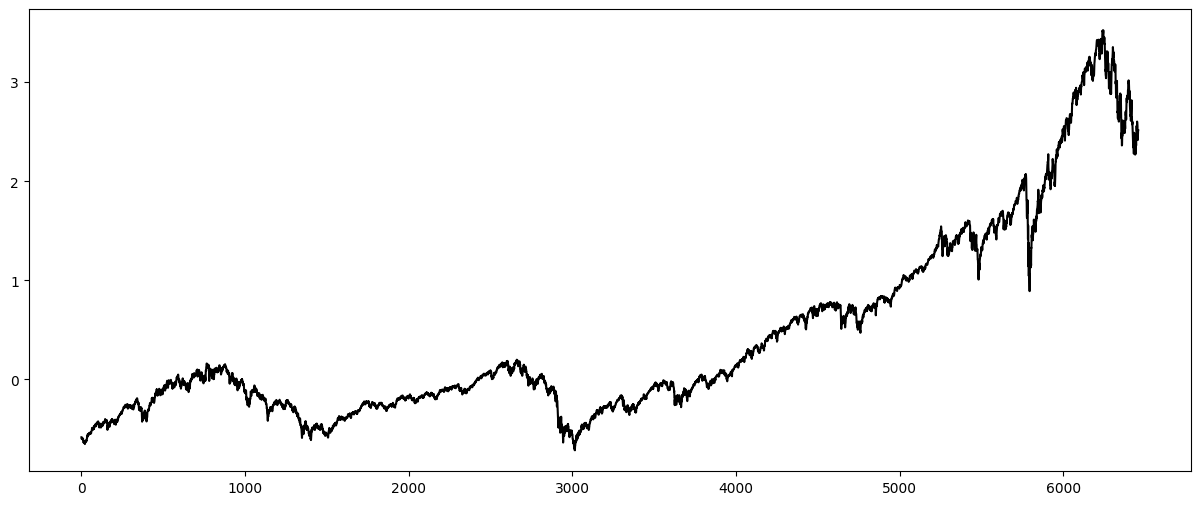

In [ ]:
# ===============================
# Visuals to see the predictions made
# ===============================
def recursive_forecast(model, last_sequence, n_steps=30):
    """
    last_sequence: (SEQ_LEN, n_features) — already scaled
    returns: (n_steps,) scaled predictions
    """
    seq = last_sequence.copy()
    preds = []

    for _ in range(n_steps):
        x = seq[np.newaxis, :, :]          # (1, seq_len, n_features)
        y_hat = model.predict(x)[0, 0]
        preds.append(y_hat)

        # Shift sequence
        next_row = seq[-1].copy()          # keep features unchanged
        seq = np.vstack([seq[1:], next_row])

    return np.array(preds)

N_FUTURE = 100

last_seq = X_test[-1]  # last available sequence from test set
future_preds = recursive_forecast(model, last_seq, N_FUTURE)

close_series = df[TARGET_COL].values

train_size = len(y_train)
val_size = len(y_val)
test_size = len(y_test)

# Align indices
train_idx = np.arange(train_size)
val_idx = np.arange(train_size, train_size + val_size)
test_idx = np.arange(train_size, train_size + val_size + test_size)
future_idx = np.arange(train_size + val_size, train_size + val_size + test_size + N_FUTURE)

plt.figure(figsize=(15,6))

# Historical prices
plt.plot(close_series, label="True Close", color="black")

# Train predictions
train_preds = model.predict(X_train).reshape(-1)
train_preds = prices_scaler.inverse_transform(train_preds.reshape(-1,1)).reshape(-1)
plt.plot(train_idx, train_preds, label="Train Prediction", color="green")

# Validation predictions
val_preds = model.predict(X_val).reshape(-1)
plt.plot(val_idx, val_preds, label="Validation Prediction", color="blue")

# Test predictions
test_preds = model.predict(X_test).reshape(-1)
plt.plot(val_idx, test_preds, label="Test Prediction", color="blue")

# Future forecast
plt.plot(future_idx, future_preds, label="Future Forecast", color="red", linestyle="--")

plt.axvline(train_size, color="gray", linestyle=":")
plt.axvline(train_size + val_size, color="gray", linestyle=":")

plt.title("LSTM Close Price Forecast")
plt.xlabel("Time")
plt.ylabel("Scaled Close")
plt.legend()
plt.grid(True)
plt.show()